# Libraries ,drive mount

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# finding text height

maximum:11


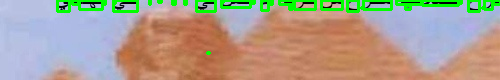

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/OCR_BLNK/OCR_DATA/samples_images/105.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Set a threshold value for dark text regions
threshold_value = 110
# Apply binary thresholding (dark text on white background)
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Loop through each contour and calculate its height
l=[]
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    l.append(h)

    #print(f"Height of text region: {h} pixels")
print(f"maximum:{max(l)}")
# Draw rectangles around detected text regions
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with detected text regions
cv2_imshow(image)

function return max height

In [ ]:
def text_height(Image_path,threshold):
  # Load the image
  image = cv2.imread(Image_path)
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Set a threshold value for dark text regions
  threshold_value = threshold
  # Apply binary thresholding (dark text on white background)
  _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
  # Find contours in the binary image
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # Loop through each contour and calculate its height
  l=[]
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    l.append(h)
  return max(l)

# Unzipping data

In [ ]:
# zip_file_path = '/content/drive/MyDrive/OCR_BLNK/OCR_DATA/OCR_Text_Dataset.zip'
# extracted_folder_path = '/content/drive/MyDrive/OCR_BLNK/OCR_DATA/unziped_data'
# import zipfile
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_folder_path)


# DATA

Make a dataframe to filter the images

In [ ]:
# Specify the path to the image folder
image_folder_path = '/content/drive/MyDrive/OCR_BLNK/OCR_DATA/unziped_data/OCR_Text'

# List all files in the image folder
image_files = [file for file in os.listdir(image_folder_path) if file.endswith('.jpg')]

# Create an empty list to store data
data = []

# Loop over the image files and calculate text heights
for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    text_height_value = text_height(image_path, 110)  # Call the text_height function with appropriate parameters

    # Get the corresponding text file path
    text_file_path = os.path.join(image_folder_path, os.path.splitext(image_file)[0] + '.txt')

    # Read the text file content
    text_file_content = ""
    if os.path.exists(text_file_path):
        with open(text_file_path, 'r') as text_file:
            text_file_content = text_file.read()

    data.append({
        'ImageName': image_file,
        'TextHeight': text_height_value,
        'TextFileName': os.path.basename(text_file_path),
        'TextContent': text_file_content
    })

# Create a Pandas DataFrame from the data
image_df = pd.DataFrame(data)

# Display the DataFrame
#print(image_df)


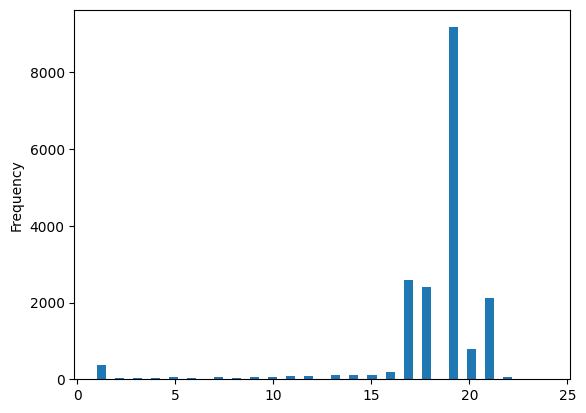

In [ ]:
image_df['TextHeight'].plot(kind='hist',bins=50);

The cropped text dissapear when the heigh of the text is 17 or more below this threshold the text is unreadable

In [ ]:
# use approx 92 % of the data
filtered_data = image_df.loc[image_df['TextHeight'] >= 17]
(filtered_data.shape[0]/image_df.shape[0])*100

91.92865941834931

In [ ]:
filtered_data.to_csv("filtered_data.csv")

In [ ]:
filtered_data["TextHeight"].value_counts()

19    9176
17    2595
18    2401
21    2112
20     800
22      69
23      10
24       1
Name: TextHeight, dtype: int64

In [ ]:
filtered_data.to_excel("cleanedd_images.xlsx")
filtered_data.to_csv("cleanedd_images.csv")

# Image Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/OCR_BLNK/OCR_DATA/unziped_data/clean_images.csv",index_col=None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18384 entries, 0 to 18383
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    18384 non-null  int64 
 1   ImageName     18384 non-null  object
 2   TextHeight    18384 non-null  int64 
 3   TextFileName  18384 non-null  object
 4   TextContent   18367 non-null  object
dtypes: int64(2), object(3)
memory usage: 718.2+ KB


In [ ]:
import os
import cv2

# Define the function to apply filters and save images
def apply_filters_and_save(input_path, output_path):
    # Check if the output image already exists
    if os.path.exists(output_path):
        print(f"Output image '{output_path}' already exists. Skipping...")
        return

    image = cv2.imread(input_path)
    # Convert the image to grayscale using OpenCV
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Set a threshold value (adjust as needed)
    threshold_value = 110
    # Apply binary thresholding
    _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    # Save the filtered image
    cv2.imwrite(output_path, binary_image)


# Specify the paths
input_image_folder = '/content/drive/MyDrive/OCR_BLNK/OCR_DATA/unziped_data/OCR_Text'
output_image_folder = '/content/drive/MyDrive/OCR_BLNK/OCR_DATA/unziped_data/filtered_images'

# Create the output folder if it doesn't exist
if not os.path.exists(output_image_folder):
    os.makedirs(output_image_folder)

# Iterate through the DataFrame and apply filters
for index, row in df.iterrows():
    image_name = row['ImageName']
    input_path = os.path.join(input_image_folder, image_name)
    output_path = os.path.join(output_image_folder, image_name)

    apply_filters_and_save(input_path, output_path)
